<img src="../img/uc3m-logo.jpg" alt="UC3M logo" width="200"/>

# First Homework: Linear and Discrete Models (Topics 1, 2)
## BsC in Data Science and Engineering - Optimization and Analytics (2022-2023)

Author: Rodrigo Oliver Coimbra (NIA: 100451788)

### 1. Introduction

It can be stated that the role of healthcare is increasingly important in our society as it ages and new treatments are developed by scientists to prevent, cure or mitigate diseases. Sometime during 2019 a novel coronavirus emerged, roughly one hundred years later than the 1918 influenza pandemic, spreading throughout the world and wreacking havoc on communities and testing the ability of the healthcare system to resist such challenges. Hospitals in Spain and all over the world were quick to adapt their processes to this threat and increased their capabilities by expanding the number of beds available and that of the medical staff. 

Researchers have been studying bacteria, viruses, fungi, amoebae and animals looking for potential pathogenic beings and vectors so as to monitor them and advise national and international health agencies. Therefore, the possibility of another outbreak cannot be dismissed and healthcare providers should be prepared for such events and have concrete and efficient contingency plans.

An important problem that might be addressed using linear programming tools is the allocation of resources, staff and beds to patients, especially during the course of the acute phase of a pandemic. This is particularly relevant for healthcare providers as they have limited resources on which many lives depend upon.


### 2. Model overview (Continuous case)

#### 2.1 General conditions

For this assignment an Intensive Care Unit (ICU) corresponding to a provincial Spanish hospital is used. To this end information was extracted about the number of ICU beds available and the number of intensivists in the University Hospital Complex of León.

The largest number of ICU beds in the University Hospital Complex of León was recorded on February 5, 2021, numbering 80 of them. [<a href="#jcyl-icu-beds">1</a>] This gives us an idea of the increase that would be needed in response to a disease outbreak, the double of the current number of ICU beds (53 as of October 9, 2022) was chosen for the modelling, that is, 106 beds.

According to the website of the University Hospital Complex of León, the medical staff of its Intensive Medicine Unit is comprised by 7 physicians and 5 MIR trainees. [<a href="#jcyl-icu-profile">2</a>]  For this model, 7 physicians plus 3 MIR trainees are considered - plus 7 reinforcements from other hospitals -, therefore amounting to 17 doctors (this information will be used in the Discrete version of the model more precisely). For the continuous version of the model it will be assumed that physicians are working the number of hours that is established by law.

The document *Unidad de cuidados intensivos: Estándares y Recomendaciones* authored by the Spanish Ministry of Health in 2010 establishes the following *assistential levels* (detailed here with some modifications): [<a href="#icu-levels">3</a>]

- Level I
    - 1 physician per 10 patients (8 am - 6 pm) (on weekdays)
    - 1 physician per 10 patients (6 pm - 8 am) (on weekdays)

- Level II
    - 1 physician per 8 patients (8 am - 6 pm) (whole week)
    - 1 physician per 8 patients (8 am - 6 pm) (on weekdays)

- Level III
    - 1 physician per 4 patients (8 am - 6 pm) (whole week)
    - 1 physician per 12 patients (6 pm - 8 am) (whole week)

Each level is adapted to the seriousness and clinical condition of the patients:

| **Level** | **Description**                                                                                                                                    |
|-----------|----------------------------------------------------------------------------------------------------------------------------------------------------|
| I         | Patients whose conditions may deteriorate or that came from a higher level of care.                                                                |
| II        | Patients that require frequent observation/intervention, need machine support, have had an operation recently or came from a higher level of care. |
| III       | Patients that require breathing support as well as two other vital functions via machine support.                                                  |

This model is similar to that of other European countries and is more or less compatible with the findings of a 2017 research report that suggested the optimal Patient-to-Intensivist ratio being 7.5, being that value the one that minimized hospital mortality. This investigation also indicated that both a reduction and an increase in this ratio lead to higher hospital deaths in a U-shaped form. [<a href="#optimal-PIR">4</a>]

#### 2.2 Specific conditions

Our model will try to minimize the difference between the actual Intensivist-to-Patient ratio and the optimal one that is defined by the Spanish Ministry of Health. This will be achieved by assigning a variable number $x$ of physicians to a given turn for either the Infectious Section and the Non-Infectious Section of the UCI. This model would be of use in the first week of the outbreak where new physicians have not arrived yet.

**Decision variables**

Thus, for a given week:

|                                       | Mon        | Tue        | Wed        | Thu        | Fri        | Sat        | Sun        |
|---------------------------------------|------------|------------|------------|------------|------------|------------|------------|
| 8am - 6pm (Level I, infectious)       | $x_{0,0}$  | $x_{0,1}$  | $x_{0,2}$  | $x_{0,3}$  | $x_{0,4}$  | $x_{0,5}$  | $x_{0,6}$  |
| 8am - 6pm (Level II, infectious)      | $x_{1,0}$  | $x_{1,1}$  | $x_{1,2}$  | $x_{1,3}$  | $x_{1,4}$  | $x_{1,5}$  | $x_{1,6}$  |
| 8am - 6pm (Level III, infectious)     | $x_{2,0}$  | $x_{2,1}$  | $x_{2,2}$  | $x_{2,3}$  | $x_{2,4}$  | $x_{2,5}$  | $x_{2,6}$  |
| 6pm - 8am (Level I, infectious)       | $x_{3,0}$  | $x_{3,1}$  | $x_{3,2}$  | $x_{3,3}$  | $x_{3,4}$  | $x_{3,5}$  | $x_{3,6}$  |
| 6pm - 8am  (Level II, infectious)     | $x_{4,0}$  | $x_{4,1}$  | $x_{4,2}$  | $x_{4,3}$  | $x_{4,4}$  | $x_{4,5}$  | $x_{4,6}$  |
| 6pm - 8am (Level III, infectious)     | $x_{5,0}$  | $x_{5,1}$  | $x_{5,2}$  | $x_{5,3}$  | $x_{5,4}$  | $x_{5,5}$  | $x_{5,6}$  |
| 8am - 6pm (Level I, non-infectious)   | $x_{6,0}$  | $x_{6,1}$  | $x_{6,2}$  | $x_{6,3}$  | $x_{6,4}$  | $x_{6,5}$  | $x_{6,6}$  |
| 8am - 6pm (Level II, non-infectious)  | $x_{7,0}$  | $x_{7,1}$  | $x_{7,2}$  | $x_{7,3}$  | $x_{7,4}$  | $x_{7,5}$  | $x_{7,6}$  |
| 8am - 6pm (Level III, non-infectious) | $x_{8,0}$  | $x_{8,1}$  | $x_{8,2}$  | $x_{8,3}$  | $x_{8,4}$  | $x_{8,5}$  | $x_{8,6}$  |
| 6pm - 8am (Level I, non-infectious)   | $x_{9,0}$  | $x_{9,1}$  | $x_{9,2}$  | $x_{9,3}$  | $x_{9,4}$  | $x_{9,5}$  | $x_{9,6}$  |
| 6pm - 8am (Level II, non-infectious)  | $x_{10,0}$ | $x_{10,1}$ | $x_{10,2}$ | $x_{10,3}$ | $x_{10,4}$ | $x_{10,5}$ | $x_{10,6}$ |
| 6pm - 8am (Level III, non-infectious) | $x_{11,0}$ | $x_{11,1}$ | $x_{11,2}$ | $x_{11,3}$ | $x_{11,4}$ | $x_{11,5}$ | $x_{11,6}$ |
|                                       |            |            |            |            |            |            |            |

Where $x_{ij}$ represents the number of physicians for a given time, level and type of disease.

According to the definition of each level that was established before the number of doctors $x_{ij}$ for Level I is 0 on weekends and also 0 for Level II on the evening shift during the weekends.

**Constraints**

- The number of doctors in a given time period per day may not exceed half the total number of physicians (so that they cannot have two shifts in one day).
- The number of doctors $x_{ij}$ for Level I is 0 on weekends.
- The number of doctors $x_{ij}$ for Level II is 0 on the evening shift during the weekends.
- There must be at least 1 doctor per 14 patients on Level I.
- There must be at least 1 doctor per 10 patients on Level II.
- There must be at least 1 doctor per 6 patients on Level III during the morning shift.
- There must be at least 1 doctor per 12 patients on Level III during the evening shift.
- There cannot be a negative number of doctors $x_{ij}$ in any case.

We can further write (notice that they are always doctors available in other levels):

|                                       | Mon        | Tue        | Wed        | Thu        | Fri        | Sat        | Sun        |
|---------------------------------------|------------|------------|------------|------------|------------|------------|------------|
| 8am - 6pm (Level I, infectious)       | $x_{0,0}$  | $x_{0,1}$  | $x_{0,2}$  | $x_{0,3}$  | $x_{0,4}$  | $0$        | $0$        |
| 8am - 6pm (Level II, infectious)      | $x_{1,0}$  | $x_{1,1}$  | $x_{1,2}$  | $x_{1,3}$  | $x_{1,4}$  | $x_{1,5}$  | $x_{1,6}$  |
| 8am - 6pm (Level III, infectious)     | $x_{2,0}$  | $x_{2,1}$  | $x_{2,2}$  | $x_{2,3}$  | $x_{2,4}$  | $x_{2,5}$  | $x_{2,6}$  |
| 6pm - 8am (Level I, infectious)       | $x_{3,0}$  | $x_{3,1}$  | $x_{3,2}$  | $x_{3,3}$  | $x_{3,4}$  | $0$        | $0$        |
| 6pm - 8am  (Level II, infectious)     | $x_{4,0}$  | $x_{4,1}$  | $x_{4,2}$  | $x_{4,3}$  | $x_{4,4}$  | $0$        | $0$        |
| 6pm - 8am (Level III, infectious)     | $x_{5,0}$  | $x_{5,1}$  | $x_{5,2}$  | $x_{5,3}$  | $x_{5,4}$  | $x_{5,5}$  | $x_{5,6}$  |
| 8am - 6pm (Level I, non-infectious)   | $x_{6,0}$  | $x_{6,1}$  | $x_{6,2}$  | $x_{6,3}$  | $x_{6,4}$  | $0$        | $0$        |
| 8am - 6pm (Level II, non-infectious)  | $x_{7,0}$  | $x_{7,1}$  | $x_{7,2}$  | $x_{7,3}$  | $x_{7,4}$  | $x_{7,5}$  | $x_{7,6}$  |
| 8am - 6pm (Level III, non-infectious) | $x_{8,0}$  | $x_{8,1}$  | $x_{8,2}$  | $x_{8,3}$  | $x_{8,4}$  | $x_{8,5}$  | $x_{8,6}$  |
| 6pm - 8am (Level I, non-infectious)   | $x_{9,0}$  | $x_{9,1}$  | $x_{9,2}$  | $x_{9,3}$  | $x_{9,4}$  | $0$        | $0$        |
| 6pm - 8am (Level II, non-infectious)  | $x_{10,0}$ | $x_{10,1}$ | $x_{10,2}$ | $x_{10,3}$ | $x_{10,4}$ | $0$        | $0$        |
| 6pm - 8am (Level III, non-infectious) | $x_{11,0}$ | $x_{11,1}$ | $x_{11,2}$ | $x_{11,3}$ | $x_{11,4}$ | $x_{11,5}$ | $x_{11,6}$ |

In this model the number of patients is estimated by subtracting the incoming patients (with data from the Spanish Ministry of Health) and the outgoing patients. For a given week the prediction is as follows per shift, level and types of disease:

|                                                   | Mon | Tue | Wed | Thu | Fri | Sat | Sun |
|---------------------------------------------------|-----|-----|-----|-----|-----|-----|-----|
| 8am - 6pm (Level I, infectious)                   | 25  | 22  | 18  | 23  | 30  | 33  | 38  |
| 8am - 6pm (Level II, infectious)                  | 14  | 10  | 12  | 18  | 20  | 24  | 27  |
| 8am - 6pm (Level III, infectious)                 | 5   | 9   | 11  | 11  | 10  | 13  | 16  |
| 6pm - 8am (Level I, infectious)                   | 28  | 24  | 22  | 26  | 25  | 35  | 39  |
| 6pm - 8am  (Level II, infectious)                 | 16  | 11  | 10  | 17  | 16  | 26  | 29  |
| 6pm - 8am (Level III, infectious)                 | 5   | 7   | 10  | 12  | 11  | 15  | 15  |
| 8am - 6pm (Level I, non-infectious)               | 15  | 8   | 10  | 8   | 7   | 6   | 5   |
| 8am - 6pm (Level II, non-infectious)              | 9   | 7   | 9   | 7   | 8   | 7   | 6   |
| 8am - 6pm (Level III, non-infectious)             | 10  | 10  | 9   | 10  | 9   | 8   | 8   |
| 6pm - 8am (Level I, non-infectious)               | 12  | 5   | 8   | 6   | 7   | 5   | 4   |
| 6pm - 8am (Level II, non-infectious)              | 10  | 9   | 9   | 6   | 8   | 7   | 7   |
| 6pm - 8am (Level III, non-infectious)             | 10  | 6   | 9   | 9   | 9   | 8   | 8   |
|                                                   |     |     |     |     |     |     |     |
| <span style="color:Crimson">Total morning</span>  | 78  | 66  | 69  | 77  | 84  | 91  | 100 |
| <span style="color:DarkCyan">Total evening</span> | 81  | 62  | 68  | 76  | 76  | 96  | 102 |


Ideal PIR (per Spanish Ministry of Health) with some slight modifications:

|                                       | Optimal PIR |
|---------------------------------------|-------------|
| 8am - 6pm (Level I, infectious)       | 1/10        |
| 8am - 6pm (Level II, infectious)      | 1/8         |
| 8am - 6pm (Level III, infectious)     | 1/4         |
| 6pm - 8am (Level I, infectious)       | 1/10        |
| 6pm - 8am  (Level II, infectious)     | 1/8         |
| 6pm - 8am (Level III, infectious)     | 1/12        |
| 8am - 6pm (Level I, non-infectious)   | 1/10        |
| 8am - 6pm (Level II, non-infectious)  | 1/8         |
| 8am - 6pm (Level III, non-infectious) | 1/4         |
| 6pm - 8am (Level I, non-infectious)   | 1/10        |
| 6pm - 8am (Level II, non-infectious)  | 1/8         |
| 6pm - 8am (Level III, non-infectious) | 1/12        |

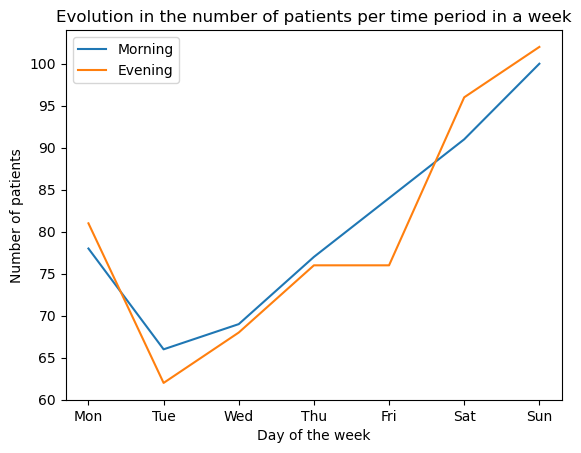

In [1]:
# Visualize the progression in the number of patients
# in the first week of the health emergency declaration

# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Establish the data
x_axis = [
    'Mon', 'Tue', 'Wed', 'Thu',
     'Fri', 'Sat', 'Sun'
]

morning = [78, 66, 69, 77, 84, 91, 100]
evening = [81, 62, 68, 76, 76, 96, 102]
  
# Plot the lines
plt.plot(x_axis, morning, label = "Morning")
plt.plot(x_axis, evening, label = "Evening")

# Display customized axis labels
plt.ylabel("Number of patients") 
plt.xlabel("Day of the week")

# Display the legend
plt.legend()

# Display the title
plt.title("Evolution in the number of patients per time period in a week")

# Displaying the title
plt.show()

### 3. General formulation (continous case)

- **Decision variables**: Quantity of physicians in each turn per level and type of disease, $x_{ij}$ with $0 \leq i \leq 11$ and $0 \leq j \leq 6$. Therefore $M = 12$ and $N = 7$.

- **Objective function**: <span style="color:red">Minimize</span> the difference between the optimal Intensivist-to-Patient ratio set by the Spanish Ministry of Health and the actual one in the first week of the outbreak response.

$$\min_{x_{ij}} \sum_{i=0}^{M-1}{\sum_{j=0}^{N-1}\left(\frac{x_{ij}}{p_{ij}}-r_{i}\right)}$$

- **Constraints**:
    - The number of doctors in a given time period per day may not exceed half the total number of physicians, so that they cannot have two shifts in one day).

    $$\sum_{i=0}^{5}x_{ij} \leq \frac{G}{2} \qquad \forall \quad 0 \leq j \leq N-1$$

    or alternatively,

    $$\sum_{i=5}^{11}x_{ij} \leq \frac{G}{2} \qquad \forall \quad 0 \leq j \leq N-1$$

    or even better,

    $$\sum_{i=0}^{11}x_{ij} \leq G\qquad \forall \quad 0 \leq j \leq N-1$$

    - The number of doctors $x_{ij}$ for Level I is 0 on weekends.
    $$x_{0,5} = x_{0,6} = x_{3,5} = x_{3,6} = x_{6,5} = x_{6,6} = x_{9,5} = x_{9,6} = 0$$

    - The number of doctors $x_{ij}$ for Level II is 0 on the evening shift during the weekends.
    $$x_{4,5} = x_{4,6} = x_{10,5} = x_{10,6} = 0$$

    - There must be at least 1 doctor per 14 patients on Level I (except weekends)
    $$x_{0,0}, x_{0,1}, \cdots, x_{0,4} \quad \frac{x_{0j}}{p_{0j}} \geq \frac{1}{14}$$
    $$x_{3,0}, x_{3,1}, \cdots, x_{3,4} \quad \frac{x_{3j}}{p_{3j}} \geq \frac{1}{14}$$
    $$x_{6,0}, x_{6,1}, \cdots, x_{6,4} \quad \frac{x_{6j}}{p_{6j}} \geq \frac{1}{14}$$
    $$x_{9,0}, x_{9,1}, \cdots, x_{9,4} \quad \frac{x_{9j}}{p_{9j}} \geq \frac{1}{14}$$

    - There must be at least 1 doctor per 10 patients on Level II (except weekend evenings)
    $$x_{1,0}, x_{1,1}, \cdots, x_{1,6} \quad \frac{x_{1j}}{p_{1j}} \geq \frac{1}{10}$$
    $$x_{4,0}, x_{4,1}, \cdots, x_{4,4} \quad \frac{x_{4j}}{p_{4j}} \geq \frac{1}{10}$$
    $$x_{7,0}, x_{7,1}, \cdots, x_{7,6} \quad \frac{x_{7j}}{p_{7j}} \geq \frac{1}{10}$$
    $$x_{10,0}, x_{10,1}, \cdots, x_{10,4} \quad \frac{x_{10j}}{p_{10j}} \geq \frac{1}{10}$$


    - There must be at least 1 doctor per 6 patients on Level III during the morning shift.
    $$x_{2,0}, x_{2,1}, \cdots, x_{2,6} \quad \frac{x_{2j}}{p_{2j}} \geq \frac{1}{6}$$
    $$x_{8,0}, x_{8,1}, \cdots, x_{8,6} \quad \frac{x_{8j}}{p_{8j}} \geq \frac{1}{6}$$

    - There must be at least 1 doctor per 12 patients on Level III during the evening shift.
    $$x_{5,0}, x_{5,1}, \cdots, x_{5,6} \quad \frac{x_{5j}}{p_{5j}} \geq \frac{1}{12}$$
    $$x_{11,0}, x_{11,1}, \cdots, x_{11,6} \quad \frac{x_{11j}}{p_{11j}} \geq \frac{1}{12}$$


    - There can never be a negative number of doctors $x_{ij}$.
    $$x_{ij} \geq 0 \qquad \forall \quad 0 \leq i \leq M-1, \quad 0 \leq j \leq N-1$$

### 4. Implementation (continuous case)

In [2]:
# We import the libraries that are needed
# for solving linear programming problems
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

# For performance analysis purposes
from time import process_time

# For saving the results returned by the solver
from pandas import Series, DataFrame

# For better code readability and maintanability
from typing import Final

# Define the constants
NUMBER_OF_INTENSIVISTS: Final = 17
WEEK: Final = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
WEEKDAYS: Final = WEEK[:5]
WEEKEND: Final = WEEK[-2:]
SHIFTS: Final = [
    'M1i', 'M2i', 'M3i',
    'E1i', 'E2i', 'E3i', 
    'M1n', 'M2n', 'M3n',
    'E1n', 'E2n', 'E3n'
    ]

#### 4.0 Problem data definition: sets and parameters

In [3]:
# We define the continuous model
continuous_model = pyo.ConcreteModel('Continuous model')

# We create the labels of the 1st dimension of the continuous model
# that correspondes to the rows of our previously seen matrix
i_labels = SHIFTS

# We check that the the length of the 1st dimension
# is equal to 12
assert len(i_labels) == len(SHIFTS)

# We create the labels of the 2nd dimension of the continuous model
# that corresponds to the columns of our previously seen matrix
j_labels = WEEK

# We check the length of the 2nd dimension
# to be equal to 7
assert len(j_labels) == 7

# We initialize the model dimensions with the labels
# that were defined above
continuous_model.i = pyo.Set(initialize = i_labels, doc = "scenarios")
continuous_model.j = pyo.Set(initialize = j_labels, doc = "days of the week")

patient_forecast = {

    # In-Python used notation:
    # M <- morning shift; E <- evening shift
    # 1, 2, 3 <- Assistance Level
    # i <- infectious; n <- non-infectious

    ('M1i', 'Mon'): 25,
    ('M1i', 'Tue'): 22,
    ('M1i', 'Wed'): 18,
    ('M1i', 'Thu'): 23,
    ('M1i', 'Fri'): 30,
    ('M1i', 'Sat'): 33,
    ('M1i', 'Sun'): 38,

    ('M2i', 'Mon'): 14,
    ('M2i', 'Tue'): 10,
    ('M2i', 'Wed'): 12,
    ('M2i', 'Thu'): 18,
    ('M2i', 'Fri'): 20,
    ('M2i', 'Sat'): 24,
    ('M2i', 'Sun'): 27,

    ('M3i', 'Mon'): 5,
    ('M3i', 'Tue'): 9,
    ('M3i', 'Wed'): 11,
    ('M3i', 'Thu'): 11,
    ('M3i', 'Fri'): 10,
    ('M3i', 'Sat'): 13,
    ('M3i', 'Sun'): 16,

    ('E1i', 'Mon'): 28,
    ('E1i', 'Tue'): 24,
    ('E1i', 'Wed'): 22,
    ('E1i', 'Thu'): 26,
    ('E1i', 'Fri'): 25,
    ('E1i', 'Sat'): 35,
    ('E1i', 'Sun'): 39,

    ('E2i', 'Mon'): 16,
    ('E2i', 'Tue'): 11,
    ('E2i', 'Wed'): 10,
    ('E2i', 'Thu'): 17,
    ('E2i', 'Fri'): 16,
    ('E2i', 'Sat'): 26,
    ('E2i', 'Sun'): 29,

    ('E3i', 'Mon'): 5,
    ('E3i', 'Tue'): 7,
    ('E3i', 'Wed'): 10,
    ('E3i', 'Thu'): 12,
    ('E3i', 'Fri'): 11,
    ('E3i', 'Sat'): 15,
    ('E3i', 'Sun'): 15,

    ('M1n', 'Mon'): 15,
    ('M1n', 'Tue'): 8,
    ('M1n', 'Wed'): 10,
    ('M1n', 'Thu'): 8,
    ('M1n', 'Fri'): 7,
    ('M1n', 'Sat'): 6,
    ('M1n', 'Sun'): 5,

    ('M2n', 'Mon'): 9,
    ('M2n', 'Tue'): 7,
    ('M2n', 'Wed'): 9,
    ('M2n', 'Thu'): 7,
    ('M2n', 'Fri'): 8,
    ('M2n', 'Sat'): 7,
    ('M2n', 'Sun'): 6,

    ('M3n', 'Mon'): 10,
    ('M3n', 'Tue'): 10,
    ('M3n', 'Wed'): 9,
    ('M3n', 'Thu'): 10,
    ('M3n', 'Fri'): 9,
    ('M3n', 'Sat'): 8,
    ('M3n', 'Sun'): 8,

    ('E1n', 'Mon'): 12,
    ('E1n', 'Tue'): 5,
    ('E1n', 'Wed'): 8,
    ('E1n', 'Thu'): 6,
    ('E1n', 'Fri'): 7,
    ('E1n', 'Sat'): 5,
    ('E1n', 'Sun'): 4,

    ('E2n', 'Mon'): 10,
    ('E2n', 'Tue'): 9,
    ('E2n', 'Wed'): 9,
    ('E2n', 'Thu'): 6,
    ('E2n', 'Fri'): 8,
    ('E2n', 'Sat'): 7,
    ('E2n', 'Sun'): 7,

    ('E3n', 'Mon'): 10,
    ('E3n', 'Tue'): 6,
    ('E3n', 'Wed'): 9,
    ('E3n', 'Thu'): 9,
    ('E3n', 'Fri'): 9,
    ('E3n', 'Sat'): 8,
    ('E3n', 'Sun'): 8
    
}

# We check the length of matrix
# to be equal to 84 (12 x 7)
assert len(patient_forecast.items()) == len(WEEK)*len(SHIFTS) # 84

# We define the forescated number of patients per scenario and
# days of the week into the model. This information is
# crucial in the solution to the problem
continuous_model.patients = pyo.Param(continuous_model.i, continuous_model.j,
    initialize = patient_forecast, doc = "Forescasted patients per scenario and day of the week")

# Print the basic parts of the continuous model
continuous_model.pprint()

3 Set Declarations
    i : scenarios
        Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   12 : {'M1i', 'M2i', 'M3i', 'E1i', 'E2i', 'E3i', 'M1n', 'M2n', 'M3n', 'E1n', 'E2n', 'E3n'}
    j : days of the week
        Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    7 : {'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'}
    patients_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain : Size : Members
        None :     2 :    i*j :   84 : {('M1i', 'Mon'), ('M1i', 'Tue'), ('M1i', 'Wed'), ('M1i', 'Thu'), ('M1i', 'Fri'), ('M1i', 'Sat'), ('M1i', 'Sun'), ('M2i', 'Mon'), ('M2i', 'Tue'), ('M2i', 'Wed'), ('M2i', 'Thu'), ('M2i', 'Fri'), ('M2i', 'Sat'), ('M2i', 'Sun'), ('M3i', 'Mon'), ('M3i', 'Tue'), ('M3i', 'Wed'), ('M3i', 'Thu'), ('M3i', 'Fri'), ('M3i', 'Sat'), ('M3i', 'Sun'), ('E1i', 'Mon'), ('E1i', 'Tue'), ('E1i', 'Wed'), ('E1i', 'Thu')

#### 4.1 Define the variables

In [4]:
# We define variables x(i,j)
# that represent the number of intensivists
# per scenario, per day of the week
continuous_model.x = pyo.Var(continuous_model.i, continuous_model.j,
    doc = "Number of intensivists",
    within = pyo.NonNegativeReals)

print(continuous_model.x.display())

x : Number of intensivists
    Size=84, Index=x_index
    Key            : Lower : Value : Upper : Fixed : Stale : Domain
    ('E1i', 'Fri') :     0 :  None :  None : False :  True : NonNegativeReals
    ('E1i', 'Mon') :     0 :  None :  None : False :  True : NonNegativeReals
    ('E1i', 'Sat') :     0 :  None :  None : False :  True : NonNegativeReals
    ('E1i', 'Sun') :     0 :  None :  None : False :  True : NonNegativeReals
    ('E1i', 'Thu') :     0 :  None :  None : False :  True : NonNegativeReals
    ('E1i', 'Tue') :     0 :  None :  None : False :  True : NonNegativeReals
    ('E1i', 'Wed') :     0 :  None :  None : False :  True : NonNegativeReals
    ('E1n', 'Fri') :     0 :  None :  None : False :  True : NonNegativeReals
    ('E1n', 'Mon') :     0 :  None :  None : False :  True : NonNegativeReals
    ('E1n', 'Sat') :     0 :  None :  None : False :  True : NonNegativeReals
    ('E1n', 'Sun') :     0 :  None :  None : False :  True : NonNegativeReals
    ('E1n', 'Thu') :

#### 4.2 Define the objective function

In [5]:
# We define the optimal Intensivist to Patient ratios
# per scenario in accordance with the recommendations
# and instructions of the Spanish Ministry of Health
optimal_ratios = [
    1/10, 1/8, 1/4,
    1/10, 1/8, 1/12,
    1/10, 1/8, 1/4,
    1/10, 1/8, 1/12
    ]

# We check the optimal_ratios length
# to be 12 (one per scenario)
assert len(optimal_ratios) == 12

In [6]:

# We define the objective function to be used
def c_objective_rule(c_model: pyo.ConcreteModel) -> float:
    return sum([((c_model.x[i,j]/c_model.patients[i,j])-optimal_ratios[count]) for count, i in enumerate(c_model.i) for j in c_model.j])

In [7]:
# We instantiate the objective function for the model which is passed as a rule
# although Pyomo minimizes by default, we still explicitly specify this
continuous_model.objective = pyo.Objective(
                                            rule = c_objective_rule,
                                            sense = pyo.minimize,
                                             doc = "Real-to-Optimal Intensivist-to-Patient ratio"
                                             )

# Visualize the objective function
continuous_model.objective.pprint()

objective : Real-to-Optimal Intensivist-to-Patient ratio
    Size=1, Index=None, Active=True
    Key  : Active : Sense    : Expression
    None :   True : minimize : 0.04*x[M1i,Mon] - 0.1 + 0.045454545454545456*x[M1i,Tue] - 0.1 + 0.05555555555555555*x[M1i,Wed] - 0.1 + 0.043478260869565216*x[M1i,Thu] - 0.1 + 0.03333333333333333*x[M1i,Fri] - 0.1 + 0.030303030303030304*x[M1i,Sat] - 0.1 + 0.02631578947368421*x[M1i,Sun] - 0.1 + 0.07142857142857142*x[M2i,Mon] - 0.125 + 0.1*x[M2i,Tue] - 0.125 + 0.08333333333333333*x[M2i,Wed] - 0.125 + 0.05555555555555555*x[M2i,Thu] - 0.125 + 0.05*x[M2i,Fri] - 0.125 + 0.041666666666666664*x[M2i,Sat] - 0.125 + 0.037037037037037035*x[M2i,Sun] - 0.125 + 0.2*x[M3i,Mon] - 0.25 + 0.1111111111111111*x[M3i,Tue] - 0.25 + 0.09090909090909091*x[M3i,Wed] - 0.25 + 0.09090909090909091*x[M3i,Thu] - 0.25 + 0.1*x[M3i,Fri] - 0.25 + 0.07692307692307693*x[M3i,Sat] - 0.25 + 0.0625*x[M3i,Sun] - 0.25 + 0.03571428571428571*x[E1i,Mon] - 0.1 + 0.041666666666666664*x[E1i,Tue] - 0.1 + 0.

#### 4.3 Define the constraints

In [8]:
# Function that establishes the constraint by which the solution to the number of doctors
# cannot be larger than the number of available medical staff
def c_MaxStaffPerDay(c_model: pyo.ConcreteModel, j: str) -> bool:
    return sum(c_model.x[i,j] for i in c_model.i) <= NUMBER_OF_INTENSIVISTS

In [9]:
# This constraint is now added to the model
continuous_model.maxStaffPerDay = pyo.Constraint(
    continuous_model.j,
    rule = c_MaxStaffPerDay,
    doc = "Maximum number of doctors per day")

# Visualize the constraint maxStaffPerDay
continuous_model.maxStaffPerDay.pprint()

maxStaffPerDay : Maximum number of doctors per day
    Size=7, Index=j, Active=True
    Key : Lower : Body                                                                                                                                                      : Upper : Active
    Fri :  -Inf : x[M1i,Fri] + x[M2i,Fri] + x[M3i,Fri] + x[E1i,Fri] + x[E2i,Fri] + x[E3i,Fri] + x[M1n,Fri] + x[M2n,Fri] + x[M3n,Fri] + x[E1n,Fri] + x[E2n,Fri] + x[E3n,Fri] :  17.0 :   True
    Mon :  -Inf : x[M1i,Mon] + x[M2i,Mon] + x[M3i,Mon] + x[E1i,Mon] + x[E2i,Mon] + x[E3i,Mon] + x[M1n,Mon] + x[M2n,Mon] + x[M3n,Mon] + x[E1n,Mon] + x[E2n,Mon] + x[E3n,Mon] :  17.0 :   True
    Sat :  -Inf : x[M1i,Sat] + x[M2i,Sat] + x[M3i,Sat] + x[E1i,Sat] + x[E2i,Sat] + x[E3i,Sat] + x[M1n,Sat] + x[M2n,Sat] + x[M3n,Sat] + x[E1n,Sat] + x[E2n,Sat] + x[E3n,Sat] :  17.0 :   True
    Sun :  -Inf : x[M1i,Sun] + x[M2i,Sun] + x[M3i,Sun] + x[E1i,Sun] + x[E2i,Sun] + x[E3i,Sun] + x[M1n,Sun] + x[M2n,Sun] + x[M3n,Sun] + x[E1n,Sun] + x[E2n,Sun] +

In [10]:
# Function that establishes that the presence of physicians
# is not prescribed for Level I during the weekend
def c_WeekendRulesFirstLevel(c_model: pyo.ConcreteModel, constraintList: pyo.ConstraintList) -> None:
    row_list = ['M1i', 'E1i', 'M1n', 'E1n']
    for i in row_list:
        for j in WEEKEND:
            constraintList.add(expr = c_model.x[i,j] == 0)
    
    assert len(constraintList) == len(row_list)*len(WEEKEND) # 8
    constraintList.pprint()
    
    return

# Function that establishes that the presence of physicians
# is not prescribed for Level II during the weekend
# during the evening shift
def c_WeekendRulesSecondLevel(c_model: pyo.ConcreteModel, constraintList: pyo.ConstraintList) -> None:
    row_list = ['E2i', 'E2n']
    for i in row_list:
        for j in WEEKEND:
            constraintList.add(expr = c_model.x[i,j] == 0)

    assert len(constraintList) == len(row_list)*len(WEEKEND) # 4
    constraintList.pprint()

    return

In [11]:
"""
continuous_model.weekendRules = pyo.Constraint(
    rule = c_WeekendRules,
    doc = "Medical staff weekend restrictions"
)
"""

# The medical staff constraints for Level I
# during the weekend are added to the model
continuous_model.weekendrules_firstlevel = pyo.ConstraintList()
c_WeekendRulesFirstLevel(continuous_model, continuous_model.weekendrules_firstlevel)

# The medical staff constraints for Level I
# during the weekend in the evening shift
# are added to the model
continuous_model.weekendrules_secondlevel = pyo.ConstraintList()
c_WeekendRulesSecondLevel(continuous_model, continuous_model.weekendrules_secondlevel)


weekendrules_firstlevel : Size=8, Index=weekendrules_firstlevel_index, Active=True
    Key : Lower : Body       : Upper : Active
      1 :   0.0 : x[M1i,Sat] :   0.0 :   True
      2 :   0.0 : x[M1i,Sun] :   0.0 :   True
      3 :   0.0 : x[E1i,Sat] :   0.0 :   True
      4 :   0.0 : x[E1i,Sun] :   0.0 :   True
      5 :   0.0 : x[M1n,Sat] :   0.0 :   True
      6 :   0.0 : x[M1n,Sun] :   0.0 :   True
      7 :   0.0 : x[E1n,Sat] :   0.0 :   True
      8 :   0.0 : x[E1n,Sun] :   0.0 :   True
weekendrules_secondlevel : Size=4, Index=weekendrules_secondlevel_index, Active=True
    Key : Lower : Body       : Upper : Active
      1 :   0.0 : x[E2i,Sat] :   0.0 :   True
      2 :   0.0 : x[E2i,Sun] :   0.0 :   True
      3 :   0.0 : x[E2n,Sat] :   0.0 :   True
      4 :   0.0 : x[E2n,Sun] :   0.0 :   True


In [12]:
# Function that implements the minimal Intensivist-to-Patients ratio that
# is minimally admissible taking into account healthcare standards
# for Level I (which only requires physicians during weekdays)
def c_MinProportionFirstLevel(c_model: pyo.ConcreteModel, constraintList: pyo.ConstraintList) -> None:
    row_list = ['M1i', 'E1i', 'M1n', 'E1n']
    for i in row_list:
        for j in WEEKDAYS:
            constraintList.add(expr = c_model.x[i,j]/c_model.patients[i,j] >= 1/14)

    assert len(constraintList) == len(row_list)*len(WEEKDAYS) # 20
    constraintList.pprint()
    
    return

In [13]:
# Function that implements the minimal Intensivist-to-Patients ratio that
# is minimally admissible taking into account healthcare standards
# for Level II (which only requires physicians all week for the
# morning shift, but not for the evening one)
def c_MinProportionSecondLevel(c_model: pyo.ConcreteModel, constraintList: pyo.ConstraintList) -> None:

    # MORNING SHIFT
    row_list_morning = ['M2i', 'M2n']
    for i in row_list_morning:
        for j in WEEK:
            constraintList.add(expr = c_model.x[i,j]/c_model.patients[i,j] >= 1/10)

    # EVENING SHIFT
    row_list_evening = ['E2i', 'E2n']
    for i in row_list_evening:
        for j in WEEKDAYS:
            constraintList.add(expr = c_model.x[i,j]/c_model.patients[i,j] >= 1/10)
    
    assert len(constraintList) == (len(row_list_morning)*len(WEEK) + len(row_list_evening)*len(WEEKDAYS)) # 24
    constraintList.pprint()

    return

In [14]:
# Function that implements the minimal Intensivist-to-Patients ratio that
# is minimally admissible taking into account healthcare standards
# for Level III (which requires physicians all week but at
# different ratios, in the morning shift at min. 1/6 and
# at the evening one at min. 1/12)
def c_MinProportionThirdLevel(c_model: pyo.ConcreteModel, constraintList: pyo.ConstraintList) -> None:

    # MORNING SHIFT
    row_list_morning = ['M3i', 'M3n']
    for i in row_list_morning:
        for j in WEEK:
            constraintList.add(expr = c_model.x[i,j]/c_model.patients[i,j] >= 1/6)

    # EVENING SHIFT
    row_list_evening = ['E3i', 'E3n']
    for i in row_list_evening:
        for j in WEEK:
            constraintList.add(expr = c_model.x[i,j]/c_model.patients[i,j] >= 1/12)

    assert len(constraintList) == (len(row_list_morning)*len(WEEK) + len(row_list_evening)*len(WEEK)) # 28
    constraintList.pprint()

    return


In [15]:
# The minimal Intensivist-to-Patient constraints for 
# Level I are added to the model
continuous_model.minproportions_firstlevel = pyo.ConstraintList()
c_MinProportionFirstLevel(continuous_model, continuous_model.minproportions_firstlevel)

minproportions_firstlevel : Size=20, Index=minproportions_firstlevel_index, Active=True
    Key : Lower               : Body                            : Upper : Active
      1 : 0.07142857142857142 :                 0.04*x[M1i,Mon] :  +Inf :   True
      2 : 0.07142857142857142 : 0.045454545454545456*x[M1i,Tue] :  +Inf :   True
      3 : 0.07142857142857142 :  0.05555555555555555*x[M1i,Wed] :  +Inf :   True
      4 : 0.07142857142857142 : 0.043478260869565216*x[M1i,Thu] :  +Inf :   True
      5 : 0.07142857142857142 :  0.03333333333333333*x[M1i,Fri] :  +Inf :   True
      6 : 0.07142857142857142 :  0.03571428571428571*x[E1i,Mon] :  +Inf :   True
      7 : 0.07142857142857142 : 0.041666666666666664*x[E1i,Tue] :  +Inf :   True
      8 : 0.07142857142857142 : 0.045454545454545456*x[E1i,Wed] :  +Inf :   True
      9 : 0.07142857142857142 : 0.038461538461538464*x[E1i,Thu] :  +Inf :   True
     10 : 0.07142857142857142 :                 0.04*x[E1i,Fri] :  +Inf :   True
     11 : 0.071428571

In [16]:
# The minimal Intensivist-to-Patient constraints for 
# Level II are added to the model
continuous_model.minproportions_secondlevel = pyo.ConstraintList()
c_MinProportionSecondLevel(continuous_model, continuous_model.minproportions_secondlevel)

minproportions_secondlevel : Size=24, Index=minproportions_secondlevel_index, Active=True
    Key : Lower : Body                            : Upper : Active
      1 :   0.1 :  0.07142857142857142*x[M2i,Mon] :  +Inf :   True
      2 :   0.1 :                  0.1*x[M2i,Tue] :  +Inf :   True
      3 :   0.1 :  0.08333333333333333*x[M2i,Wed] :  +Inf :   True
      4 :   0.1 :  0.05555555555555555*x[M2i,Thu] :  +Inf :   True
      5 :   0.1 :                 0.05*x[M2i,Fri] :  +Inf :   True
      6 :   0.1 : 0.041666666666666664*x[M2i,Sat] :  +Inf :   True
      7 :   0.1 : 0.037037037037037035*x[M2i,Sun] :  +Inf :   True
      8 :   0.1 :   0.1111111111111111*x[M2n,Mon] :  +Inf :   True
      9 :   0.1 :  0.14285714285714285*x[M2n,Tue] :  +Inf :   True
     10 :   0.1 :   0.1111111111111111*x[M2n,Wed] :  +Inf :   True
     11 :   0.1 :  0.14285714285714285*x[M2n,Thu] :  +Inf :   True
     12 :   0.1 :                0.125*x[M2n,Fri] :  +Inf :   True
     13 :   0.1 :  0.14285714285714285*

In [17]:
# The minimal Intensivist-to-Patient constraints for 
# Level III are added to the model
continuous_model.minproportions_thirdlevel = pyo.ConstraintList()
c_MinProportionThirdLevel(continuous_model, continuous_model.minproportions_thirdlevel)

minproportions_thirdlevel : Size=28, Index=minproportions_thirdlevel_index, Active=True
    Key : Lower               : Body                           : Upper : Active
      1 : 0.16666666666666666 :                 0.2*x[M3i,Mon] :  +Inf :   True
      2 : 0.16666666666666666 :  0.1111111111111111*x[M3i,Tue] :  +Inf :   True
      3 : 0.16666666666666666 : 0.09090909090909091*x[M3i,Wed] :  +Inf :   True
      4 : 0.16666666666666666 : 0.09090909090909091*x[M3i,Thu] :  +Inf :   True
      5 : 0.16666666666666666 :                 0.1*x[M3i,Fri] :  +Inf :   True
      6 : 0.16666666666666666 : 0.07692307692307693*x[M3i,Sat] :  +Inf :   True
      7 : 0.16666666666666666 :              0.0625*x[M3i,Sun] :  +Inf :   True
      8 : 0.16666666666666666 :                 0.1*x[M3n,Mon] :  +Inf :   True
      9 : 0.16666666666666666 :                 0.1*x[M3n,Tue] :  +Inf :   True
     10 : 0.16666666666666666 :  0.1111111111111111*x[M3n,Wed] :  +Inf :   True
     11 : 0.16666666666666666 : 

#### 4.4 Solve the linear programming model

In [18]:
# Instantiate the linear programming algorithm implementation
# that is to be used, can be changed to
# Solver = SolverFactory('glpk'')
Solver = SolverFactory('gurobi')

# Define the dual suffix for the
# next section about Sensitivity
# and Lagrange multipliers
continuous_model.dual = pyo.Suffix(direction = pyo.Suffix.IMPORT)

# Solve the model using the solver
# Start the stopwatch
clock_start = process_time() 
Results = Solver.solve(continuous_model)
clock_stop = process_time()

# Save the results into the results directory
t_results = DataFrame()

# Loop through the result components
# to get the Scenario-Solution pairs
# in order to write them into a csv file
# for further inspection
for v in continuous_model.component_objects(pyo.Var):
    row_names = [pyo.name(v[i]) for i in v]
    row_values = [pyo.value(v[i]) for i in v]

# Forming the Scenario-Solution pairs
t_results = list(map(list, zip(row_names, row_values)))

# Instatiate and define a data frame to store this information
df = DataFrame(t_results, columns=['Scenario', 'Solution (in number of doctors)'])

# Saving the information to a csv file in the results directory
df.to_csv("../results/sol_continuous.csv", mode = "w+")

# Display the Pyomo-[Gurobi/GLPK] solution
# for the x variables
print("Elapsed time: ", clock_stop-clock_start)
continuous_model.x.display()

Elapsed time:  0.015625
x : Number of intensivists
    Size=84, Index=x_index
    Key            : Lower : Value               : Upper : Fixed : Stale : Domain
    ('E1i', 'Fri') :     0 :  1.7857142857142856 :  None : False : False : NonNegativeReals
    ('E1i', 'Mon') :     0 :                 2.0 :  None : False : False : NonNegativeReals
    ('E1i', 'Sat') :     0 :                 0.0 :  None : False : False : NonNegativeReals
    ('E1i', 'Sun') :     0 :                 0.0 :  None : False : False : NonNegativeReals
    ('E1i', 'Thu') :     0 :   1.857142857142857 :  None : False : False : NonNegativeReals
    ('E1i', 'Tue') :     0 :  1.7142857142857142 :  None : False : False : NonNegativeReals
    ('E1i', 'Wed') :     0 :  1.5714285714285714 :  None : False : False : NonNegativeReals
    ('E1n', 'Fri') :     0 :                 0.5 :  None : False : False : NonNegativeReals
    ('E1n', 'Mon') :     0 :  0.8571428571428571 :  None : False : False : NonNegativeReals
    ('E1n', 

In [19]:
# Display the entire model solution
# to obtain the model objective function
# value given the data
continuous_model.display()

Model Continuous model

  Variables:
    x : Number of intensivists
        Size=84, Index=x_index
        Key            : Lower : Value               : Upper : Fixed : Stale : Domain
        ('E1i', 'Fri') :     0 :  1.7857142857142856 :  None : False : False : NonNegativeReals
        ('E1i', 'Mon') :     0 :                 2.0 :  None : False : False : NonNegativeReals
        ('E1i', 'Sat') :     0 :                 0.0 :  None : False : False : NonNegativeReals
        ('E1i', 'Sun') :     0 :                 0.0 :  None : False : False : NonNegativeReals
        ('E1i', 'Thu') :     0 :   1.857142857142857 :  None : False : False : NonNegativeReals
        ('E1i', 'Tue') :     0 :  1.7142857142857142 :  None : False : False : NonNegativeReals
        ('E1i', 'Wed') :     0 :  1.5714285714285714 :  None : False : False : NonNegativeReals
        ('E1n', 'Fri') :     0 :                 0.5 :  None : False : False : NonNegativeReals
        ('E1n', 'Mon') :     0 :  0.85714285714

#### 4.5 Interpret the continuous model results

In the continuous variable, we had 84 variables and 91 constraints in total. The results for the 84 variables representing the number of physicians in each turn for a given day were allowed to fluctuate within the positive reals. They thus yielded integer and non-integer results that can be interpreted, nonetheless. Why and how? 

This model is useful as it provides a simple enough overview of the scheduling problem in a quantitative fashion that would allow a hospital manager to have an idea of the number of physicians that should be in each scenario to improve the quality of medical care during an epidemic emergency when resources are especially scarce.

Integer values are directly interpretable as a value of “2” is a clear indicator that 2 physicians are needed in that shift but, what about the non-integer values? These values are not useful alone, but they do make sense when paired with the results for other turns that take place at the same time slot. In a moment when resources are critically scarce, it may be useful to employ a doctor that is already working in another concurrent scenario; for example, in two concurrent scenarios, A with result 1.8 and B with result 0.8, it may be interpreted that a doctor assigned in B could devote 20% of its efforts in helping his/her fellow doctors in scenario A where there is tighter need for 2 doctors rather than only one.

A particular example in the dataset is that (‘E3n’,’ Tue’) has a value of 0.5 and a concurrent scenario (‘E3i’,’ Tue’) has a value of 0.583. In this case, a single doctor would be better employed by assisting both areas half of the time; roughly 50%, 50% as it is per the results given by the optimizer. Other similar case arises throughout the solution set.

We can see that the value taken by the objective function is -3.6380952380952394 which means (by the mathematical definition of the objective function provided previously) that the medical staff is being stretched thin by the number of patients and that - cumulatively - there are no spare doctors, for this we would need a positive value of the objective function. It is clear however that for a number of variables of 84, this cumulative deviation is not very significant as we are sure that there is basic minimum ratio that is assured through the constraints.

### 5. Sensitivities (continuous case)

Lagrange multipliers are used to obtain the solution of constrained optimization problems. More complex formulations of the Lagrangian theorem that allow for the optimization of continuous functions over convex regions (note that they might not be necessarily smooth). [<a href="#cone-dual">5</a>]

In this more elaborate formulation we are able to accomotade inequality constraints that overcome the limitations of only establishing $\nabla L = 0$ which corresponded to its simplest version.

To sustain this more complex version of the Lagrangian multipliers we introduce a definition that relies on the saddle points of the Lagrangian. We know ought to present the following concepts to better illustrate this new perspective: [<a href="#cone-dual">5</a>]

- For a matrix $V$ whose columns are made up **generators**, vectors $\vec{v_0}, \vec{v_2}, \cdots, \vec{v_{n-1}}$ its **cone** is defined as:

$$cone(V) = \left\{ \vec{c} \in \mathbb{R}^n : \quad \vec{c} = \sum_{k=0}^{n-1}\alpha_k v_k; \quad \alpha_k \in \mathbb{R}^+ \right\}$$

For a vector $\vec{a}$ containing all the $\alpha_k$ and the same matrix $V$ we can rewrite it as:

$$cone(V) = \left\{ \vec{c} \in \mathbb{R}^n : \quad \vec{c} = V \alpha; \quad \alpha \in \mathbb{R}^+ \right\}$$

- For a given cone $C$, its **dual** $C^\perp$ is defined as: 

$$C^\perp = \left\{\vec{x} \in \mathbb{R}^m : \quad \vec{x} \cdot \vec{c} \leq 0; \quad \forall \vec{c} \in C \right\}$$

- A cone with the property $C = -C^\perp$ is known as **self-dual**.

A more comprehensive form of the Lagrangian multiplier theorem establishes an equivalence between the problem of finding $\vec{x}$ to minimize a function $f(\vec{x})$ subject to a number of constraints and that of finidng the $\vec{x}$ and $\vec{p}$ that minimize and maximize, respectively, the Lagrangian $L(\vec{x}, \vec{p})$, where $p$ belongs to a cone that happens to be self-dual.

The first problem was called the *linear program*, whereas the second is know as the *dual program*. Because of their behavior, dual variables are sometimes termed **shadow prices** as they represent the change in the objective function optimal value per infinitesimal unit of a given constraint. [<a href="#cone-dual">5</a>]

This is intriscaly related to the concept of **sensitivity** is defined as the *change in the objective function if there is a marginal change in vector b*.

In [20]:
# After importing the corresponding suffix
# in the previous cell, we display the
# duals/sensitivities per constraint
continuous_model.dual.display()

dual : Direction=Suffix.IMPORT, Datatype=Suffix.FLOAT
    Key                            : Value
               maxStaffPerDay[Fri] :   0.0
               maxStaffPerDay[Mon] :   0.0
               maxStaffPerDay[Sat] :   0.0
               maxStaffPerDay[Sun] :   0.0
               maxStaffPerDay[Thu] :   0.0
               maxStaffPerDay[Tue] :   0.0
               maxStaffPerDay[Wed] :   0.0
     minproportions_firstlevel[10] :   1.0
     minproportions_firstlevel[11] :   1.0
     minproportions_firstlevel[12] :   1.0
     minproportions_firstlevel[13] :   1.0
     minproportions_firstlevel[14] :   1.0
     minproportions_firstlevel[15] :   1.0
     minproportions_firstlevel[16] :   1.0
     minproportions_firstlevel[17] :   1.0
     minproportions_firstlevel[18] :   1.0
     minproportions_firstlevel[19] :   1.0
      minproportions_firstlevel[1] :   1.0
     minproportions_firstlevel[20] :   1.0
      minproportions_firstlevel[2] :   1.0
      minproportions_firstlevel[3] :   1.0


It is possible to see that all the *maxStaffPerDay* and *weekednrules* constraints have duals equal to zero. Apart from this fact, these constraints are defined as equalities that are to be strictly respected, whereas the ones that are non-zero, in this case equal to 1 are those corresponding to the *minproportions* which are established as inequalities.

In this case, for each one of the *minproportions* constraints, it can be interpreted that an increase in the number of staff in a given scenario, through an increase in the ratio, delivers a unit improvement. It is clear know why this is not the case in the *maxStaffPerDay* and *weekendrules* cases, as the objective function is not improved by any modification in this sense.

*Moreover*, the fact that the Dual/Lagrange multipliers of *maxStaffPerDay* and *weekendRules* are 0 means - in general - that a change (either increment or decrement) in the term to the right-side of the equation/inequality does *not* modify the optimal solution of the problem. In the case of *minproprtions* the modification occurs, as previously stated - which is logical, as these constraints guarantee a minimum proportion which is directly related to the minimization of the objective function.

### 6. Model Overview (discrete Case)

#### 6.1 General conditions

In the discrete case we will be employing binary variables to represent the scheduling problem that a hospital manager may be interested in solving in order to best respond to a disease outbreak by providing the best medical care in term of Intensivist-to-Patient ratios and medical staff work safety, namely in the case of rest hours as mandated by European and Spanish law. Unlike the continous case, we will be enforcing these restrictions through explicit constraints.

The objective fucntion will be very similar as we strive minimze the difference between the actual Intensivist-to-Patient ratio and the optimal one as determined by the Spanish Health Ministry.

Except when noted, the general conditions that were laid out in the continuous case still hold true for the discrete one.

We define the following three vectors:

- Vector of physicians (binary): $$\vec{G} = (g_0, g_1, \cdots, g_{P-1})$$
- Vector of days of the week: $$\vec{D} = (d_0, d_1, \cdots, d_{M-1})$$
- Vector of scenarios: $$\vec{S} = (s_0, s_1, \cdots, s_{N-1})$$

It follows from the initial problem formulation that $P = 17$, $M = 7$ and $N = 12$.

#### 6.2 Specific conditions

Our model will try to minimize the difference between the actual Intensivist-to-Patient ratio and the optimal one that is defined by the Spanish Ministry of Health. This will be achieved by assigning a variable number $x$ of physicians to a given turn for either the Infectious Section and the Non-Infectious Section of the UCI. This model would be of use in the first week of the outbreak where new physicians have not arrived yet.

To better accomodate this problem, the two daily shift per scenario were chosen to last 12 hours each, as a sensible compromise between the 10 hour and 14 hour duration of the morning and evening shifts, respectively, set by the Spanish Health Ministry guidelines. It is worth noting that these twelve hour shifts include the necessary breaks for rest and food.

**Decision variables**

Decision variables $x_{i,j,k}$ will be representing whether a given physician $i$ is working at a given day $j$ and shift $k$ or not; it is a binary variable where $1$ indicates that the doctor is working and $0$ that he/she is resting.

Given the results obtained in the first section with the continuous model, it is clear that the hospital is understaffed to face this more problematic disease outbreak and thus 24 physicians are considered to be available during that week (including reinforcements from other hospitals).

Unlike in the previous case where the shift and level information were squashed so as to be able to represent the problem in a 2D manner with a matrix, this will not be possible in this instance.

**Constraints**

Constraints from the continuous case will continue to be valid under certain modifications. To these constraints we add the following requirements:

- Doctors will not work more than 48 hours per week, i.e, 4 shifts per week.

- The resting time between two shifts is 12 hours, i.e., one shift.

According to the European Directive 2003/88/CE of November 4, 2003; a limit of 48 weekly work hours is established. [<a href="#2003/88/CE">6</a>] The maximum weekly work hours were chosen for this optimization problem are they refer to a unique week during an epidemic outbreak and it includes the on duty shift that physicians usually take (except when they have a certain age or health conditions).

### 7. General formulation (discrete case)

- **Decision variables**: *Present*, a binary variable that represents whether a particular physician $i$ will be working on day $j$ at shift $k$. Mathematically:

$$
    x_{ijk} =

    \begin{cases}
        \text{1,} &\quad \text{Intensivist } i \text{ working on day } j \text{ in shift } k \\
        \text{0,} &\quad \text{otherwise.}
    \end{cases}

    \quad \forall i, j, k
$$

- **Objective function**: <span style="color:red">Minimize</span> the difference between the optimal Intensivist-to-Patient ratio set by the Spanish Ministry of Health and the actual one in the first week of the outbreak response.

$$\min_{x_{ijk}} \sum_{j=0}^{M-1}{\sum_{k=0}^{N-1}\left(\frac{x_{jk}}{p_{jk}}-r_{k}\right)}$$

where: $$x_{jk} = \sum_{i=0}^{P-1} x_{ijk} \quad \forall i$$ for a given $j$ and $k$.

even more concisely:

$$\sum_{j=0}^{M-1}\sum_{k=0}^{N-1}\left(\frac{\sum_{i=0}^{P-1} x_{ijk}}{p_{jk}}-r_k\right)$$

- **Constraints**:

- No more than 48 hours worked per week per physician, i.e., no more than 4 shifts per week per physician:
 $$\sum_{j=0}^{M-1}\sum_{k=0}^{N-1} x_{ijk} \leq 4, \quad \forall i$$

 - Minimum rest period of 12 hours between two shifts per physician, i.e., minimum rest period of one shift between two shifts per physician:
 $$\sum_{k=0}^{N-1} x_{ijk} \leq 1, \quad \forall i, j$$

 - The number of doctors $x_{ijk}$ for Level I is 0 on weekends.

 $$\sum_{i=0}^{P-1} x_{i,5,k} = 0, \text{ for } k = 0, 3, 6, 9$$

 $$\sum_{i=0}^{P-1} x_{i,6,k} = 0, \text{ for } k = 0, 3, 6, 9$$

 - The number of doctors $x_{ijk}$ for Level II is 0 on the evening shift during the weekends.

 $$\sum_{i=0}^{P-1} x_{i,5,k} = 0 \text{ for } k = 4, 10$$
 $$\sum_{i=0}^{P-1} x_{i,6,k} = 0 \text{ for } k = 4, 10$$

 - There must be at least 1 doctor per 14 patients on Level I (except weekends)

 $$\frac{\sum_{i=0}^{P-1} x_{i,j,k}}{p_{jk}} \geq \frac{1}{14} \text{ for } j = 0, 1, 2, 3, 4 \text{ and } k = 0, 3, 6, 9$$

 - There must be at least 1 doctor per 10 patients on Level II (except weekend evenings)

 $$\frac{\sum_{i=0}^{P-1} x_{i,j,k}}{p_{jk}} \geq \frac{1}{10} \text{ for } j = 0, 1, 2, 3, 4, 5, 6 \text{ and } k = 1, 4, 7, 10$$
 
 - There must be at least 1 doctor per 6 patients on Level III during the morning shift.

 $$\frac{\sum_{i=0}^{P-1} x_{i,j,k}}{p_{jk}} \geq \frac{1}{6} \text{ for } j = 0, 1, 2, 3, 4, 5, 6 \text{ and } k = 2, 8$$

 - There must be at least 1 doctor per 12 patients on Level III during the evening shift.

 $$\frac{\sum_{i=0}^{P-1} x_{i,j,k}}{p_{jk}} \geq \frac{1}{12} \text{ for } j = 0, 1, 2, 3, 4, 5, 6 \text{ and } k = 5, 11$$

- The decision variables $x_{ijk}$ are binary:
$$x_{ijk} \in \{0,1\} \quad \forall i,j,k$$

### 8. Implementation (discrete case)

In [21]:
%reset -f

# We reset environment variables
# to avoid reference errors

In [22]:
# We import the libraries that are needed
# for solving linear programming problems
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

# For performance analysis purposes
from time import process_time

# For saving the results returned by the solver
from pandas import Series, DataFrame

# For better code readability and maintanability
from typing import Final

# Define the constants
NUMBER_OF_INTENSIVISTS: Final = 24
WEEK: Final = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
WEEKDAYS: Final = WEEK[:5]
WEEKEND: Final = WEEK[-2:]
SHIFTS: Final = [
    'M1i', 'M2i', 'M3i',
    'E1i', 'E2i', 'E3i', 
    'M1n', 'M2n', 'M3n',
    'E1n', 'E2n', 'E3n'
    ]

#### 8.0 Problem data definition: sets and parameters

In [23]:
# We define the discrete model
discrete_model = pyo.ConcreteModel('Discrete model')

# i dimension : List of physicians
i_labels = ['G' + str(i) for i in range(NUMBER_OF_INTENSIVISTS)]

# We check that the length of the 1st dimension
# is equal to NUMBER_OF_INTENSIVISTS
assert len(i_labels) == NUMBER_OF_INTENSIVISTS

# j dimension : List of days of the week
j_labels = WEEK

# We check that the length of the 2nd dimension
# is equal to 7
assert len(j_labels) == 7

# k dimension: List of shifts
# there are 12 shifts of 12 hour each
k_labels = SHIFTS

# We check that the length of the 3rd dimension
# is equal to 12
assert len(k_labels) == 12

# Dictionary that stores the (day,shift_list)
k_dict = {day: k_labels for day in j_labels}

# Check that the number of k_labels is equal
# to the theoretical result of 7 * 12 = 84
count = 0
for item in k_dict.items():
    count += len(item[1])
assert count == len(WEEK)*len(SHIFTS)

# We initialize the model dimensions with the labels
# that were defined above
discrete_model.i = pyo.Set(initialize = i_labels, doc = "physicians")
discrete_model.j = pyo.Set(initialize = j_labels, doc = "days of the week")
discrete_model.k = pyo.Set(initialize = k_labels, doc = "scenarios")


patient_forecast = {

    # In-Python used notation:
    # M <- morning shift; E <- evening shift
    # 1, 2, 3 <- Assistance Level
    # i <- infectious; n <- non-infectious

    ('Mon','M1i'): 25,
    ('Tue','M1i'): 22,
    ('Wed','M1i'): 18,
    ('Thu','M1i'): 23,
    ('Fri','M1i'): 30,
    ('Sat','M1i'): 33,
    ('Sun','M1i'): 38,

    ('Mon','M2i'): 14,
    ('Tue','M2i'): 10,
    ('Wed','M2i'): 12,
    ('Thu','M2i'): 18,
    ('Fri','M2i'): 20,
    ('Sat','M2i'): 24,
    ('Sun','M2i'): 27,

    ('Mon','M3i'): 5,
    ('Tue','M3i'): 9,
    ('Wed','M3i'): 11,
    ('Thu','M3i'): 11,
    ('Fri','M3i'): 10,
    ('Sat','M3i'): 13,
    ('Sun','M3i'): 16,

    ('Mon','E1i'): 28,
    ('Tue','E1i'): 24,
    ('Wed','E1i'): 22,
    ('Thu','E1i'): 26,
    ('Fri','E1i'): 25,
    ('Sat','E1i'): 35,
    ('Sun','E1i'): 39,

    ('Mon','E2i'): 16,
    ('Tue','E2i'): 11,
    ('Wed','E2i'): 10,
    ('Thu','E2i'): 17,
    ('Fri','E2i'): 16,
    ('Sat','E2i'): 26,
    ('Sun','E2i'): 29,

    ('Mon','E3i'): 5,
    ('Tue','E3i'): 7,
    ('Wed','E3i'): 10,
    ('Thu','E3i'): 12,
    ('Fri','E3i'): 11,
    ('Sat','E3i'): 15,
    ('Sun','E3i'): 15,

    ('Mon','M1n'): 15,
    ('Tue','M1n'): 8,
    ('Wed','M1n'): 10,
    ('Thu','M1n'): 8,
    ('Fri','M1n'): 7,
    ('Sat','M1n'): 6,
    ('Sun','M1n'): 5,

    ('Mon','M2n'): 9,
    ('Tue','M2n'): 7,
    ('Wed','M2n'): 9,
    ('Thu','M2n'): 7,
    ('Fri','M2n'): 8,
    ('Sat','M2n'): 7,
    ('Sun','M2n'): 6,

    ('Mon','M3n'): 10,
    ('Tue','M3n'): 10,
    ('Wed','M3n'): 9,
    ('Thu','M3n'): 10,
    ('Fri','M3n'): 9,
    ('Sat','M3n'): 8,
    ('Sun','M3n'): 8,

    ('Mon','E1n'): 12,
    ('Tue','E1n'): 5,
    ('Wed','E1n'): 8,
    ('Thu','E1n'): 6,
    ('Fri','E1n'): 7,
    ('Sat','E1n'): 5,
    ('Sun','E1n'): 4,

    ('Mon','E2n'): 10,
    ('Tue','E2n'): 9,
    ('Wed','E2n'): 9,
    ('Thu','E2n'): 6,
    ('Fri','E2n'): 8,
    ('Sat','E2n'): 7,
    ('Sun','E2n'): 7,

    ('Mon','E3n'): 10,
    ('Tue','E3n'): 6,
    ('Wed','E3n'): 9,
    ('Thu','E3n'): 9,
    ('Fri','E3n'): 9,
    ('Sat','E3n'): 8,
    ('Sun','E3n'): 8
    
}

# We check the length of matrix
# to be equal to 84 (7 x 12)
assert len(patient_forecast.items()) == len(WEEK)*len(SHIFTS)

# We define the forecasted number of patients per scenario
# days of the week into the model. This information is
# crucial in the solution to the problem
discrete_model.patients = pyo.Param(discrete_model.j, discrete_model.k,
initialize = patient_forecast, doc = "Forecasted patients per scenario and day of the week")

# Print the basic parts of the discrete model
discrete_model.pprint()

4 Set Declarations
    i : physicians
        Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   24 : {'G0', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21', 'G22', 'G23'}
    j : days of the week
        Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    7 : {'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'}
    k : scenarios
        Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   12 : {'M1i', 'M2i', 'M3i', 'E1i', 'E2i', 'E3i', 'M1n', 'M2n', 'M3n', 'E1n', 'E2n', 'E3n'}
    patients_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain : Size : Members
        None :     2 :    j*k :   84 : {('Mon', 'M1i'), ('Mon', 'M2i'), ('Mon', 'M3i'), ('Mon', 'E1i'), ('Mon', 'E2i'), ('Mon', 

#### 8.1 Define the variables

In [24]:
# We declare the x_ijk variables of the model
# these variables are binary and 
# are initialize at the beginning as 0
# which means "not present"
discrete_model.x = pyo.Var(
                            discrete_model.i, discrete_model.j, discrete_model.k,
                            doc = "Present",
                            domain = pyo.Binary
                            )

# Print the variables x_ijk
# that were created
print(discrete_model.x.display())

# Check that the number of x_ijk variables
# coincides with the theorical result
# of 17 * 7 * 12 = 1428
assert len(list(discrete_model.x.keys())) == NUMBER_OF_INTENSIVISTS * len(WEEK) * len(SHIFTS)

x : Present
    Size=2016, Index=x_index
    Key                   : Lower : Value : Upper : Fixed : Stale : Domain
     ('G0', 'Fri', 'E1i') :     0 :  None :     1 : False :  True : Binary
     ('G0', 'Fri', 'E1n') :     0 :  None :     1 : False :  True : Binary
     ('G0', 'Fri', 'E2i') :     0 :  None :     1 : False :  True : Binary
     ('G0', 'Fri', 'E2n') :     0 :  None :     1 : False :  True : Binary
     ('G0', 'Fri', 'E3i') :     0 :  None :     1 : False :  True : Binary
     ('G0', 'Fri', 'E3n') :     0 :  None :     1 : False :  True : Binary
     ('G0', 'Fri', 'M1i') :     0 :  None :     1 : False :  True : Binary
     ('G0', 'Fri', 'M1n') :     0 :  None :     1 : False :  True : Binary
     ('G0', 'Fri', 'M2i') :     0 :  None :     1 : False :  True : Binary
     ('G0', 'Fri', 'M2n') :     0 :  None :     1 : False :  True : Binary
     ('G0', 'Fri', 'M3i') :     0 :  None :     1 : False :  True : Binary
     ('G0', 'Fri', 'M3n') :     0 :  None :     1 : False :

#### 8.2 Define the objective function

In [25]:
# We define the optimal Intensivist to Patient ratios
# per scenario in accordance with the recommendations
# and instructions of the Spanish Ministry of Health
optimal_ratios = [
    1/10, 1/8, 1/4,
    1/10, 1/8, 1/12,
    1/10, 1/8, 1/4,
    1/10, 1/8, 1/12
    ]

# We check the optimal_ratios length
# to be 12 (one per scenario)
assert len(optimal_ratios) == 12

In [26]:
# We define the objective function to be used
# following the mathematical definition given previously
# for the d_operations_rule function
def d_objective_rule(d_model: pyo.ConcreteModel) -> float:
    return sum([((sum([d_model.x[i,j,k] for i in d_model.i])/d_model.patients[j,k])-optimal_ratios[count_k]) for j in d_model.j for count_k, k in enumerate(d_model.k)])

In [27]:
# We instantiate the objective function for the model which is passed as a rule
# although Pyomo minimizes by default, we still explicitly specify this

discrete_model.objective = pyo.Objective(
                                            rule = d_objective_rule,
                                            sense = pyo.minimize,
                                            doc = "Real-to-Optimal Intensivist-to-Patient ratio"
                                            )

discrete_model.objective.pprint()

objective : Real-to-Optimal Intensivist-to-Patient ratio
    Size=1, Index=None, Active=True
    Key  : Active : Sense    : Expression
    None :   True : minimize : (x[G0,Mon,M1i] + x[G1,Mon,M1i] + x[G2,Mon,M1i] + x[G3,Mon,M1i] + x[G4,Mon,M1i] + x[G5,Mon,M1i] + x[G6,Mon,M1i] + x[G7,Mon,M1i] + x[G8,Mon,M1i] + x[G9,Mon,M1i] + x[G10,Mon,M1i] + x[G11,Mon,M1i] + x[G12,Mon,M1i] + x[G13,Mon,M1i] + x[G14,Mon,M1i] + x[G15,Mon,M1i] + x[G16,Mon,M1i] + x[G17,Mon,M1i] + x[G18,Mon,M1i] + x[G19,Mon,M1i] + x[G20,Mon,M1i] + x[G21,Mon,M1i] + x[G22,Mon,M1i] + x[G23,Mon,M1i])/25 - 0.1 + (x[G0,Mon,M2i] + x[G1,Mon,M2i] + x[G2,Mon,M2i] + x[G3,Mon,M2i] + x[G4,Mon,M2i] + x[G5,Mon,M2i] + x[G6,Mon,M2i] + x[G7,Mon,M2i] + x[G8,Mon,M2i] + x[G9,Mon,M2i] + x[G10,Mon,M2i] + x[G11,Mon,M2i] + x[G12,Mon,M2i] + x[G13,Mon,M2i] + x[G14,Mon,M2i] + x[G15,Mon,M2i] + x[G16,Mon,M2i] + x[G17,Mon,M2i] + x[G18,Mon,M2i] + x[G19,Mon,M2i] + x[G20,Mon,M2i] + x[G21,Mon,M2i] + x[G22,Mon,M2i] + x[G23,Mon,M2i])/14 - 0.125 + (x[G0,Mon,M3i]

#### 8.3 Define the constraints

In [28]:
# Function that establishes the constraint by which no doctor
# may work more than 48 hours per week, i.e., 4 shifts
def d_MaxWeeklyShifts(d_model: pyo.ConcreteModel, i: str) -> bool:
    return sum(d_model.x[i,j,k] for j in d_model.j for k in d_model.k) <= 4

In [29]:
# This constraint is now added to the model

discrete_model.maxWeeklyShifts = pyo.Constraint(
    discrete_model.i,
    rule = d_MaxWeeklyShifts,
    doc = "Maximum number of shifts per week per doctor"
)

discrete_model.maxWeeklyShifts.pprint()

maxWeeklyShifts : Maximum number of shifts per week per doctor
    Size=24, Index=i, Active=True
    Key : Lower : Body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [30]:
# Function that establishes the constraint by which the
# minimum rest period between two shifts is of 12 hours,
# i.e., one shift between two shifts
def d_MinRest(d_model: pyo.ConcreteModel, i: str, j: str) -> bool:
    return sum(d_model.x[i,j,k] for k in d_model.k) <= 1

In [31]:
# This constraint is now added to the model

discrete_model.minRest = pyo.Constraint(
    discrete_model.i,
    discrete_model.j,
    rule = d_MinRest,
    doc = "Minimum resting period between two shifts"
)

discrete_model.minRest.pprint()

minRest : Minimum resting period between two shifts
    Size=168, Index=minRest_index, Active=True
    Key            : Lower : Body                                                                                                                                                                                                      : Upper : Active
     ('G0', 'Fri') :  -Inf :             x[G0,Fri,M1i] + x[G0,Fri,M2i] + x[G0,Fri,M3i] + x[G0,Fri,E1i] + x[G0,Fri,E2i] + x[G0,Fri,E3i] + x[G0,Fri,M1n] + x[G0,Fri,M2n] + x[G0,Fri,M3n] + x[G0,Fri,E1n] + x[G0,Fri,E2n] + x[G0,Fri,E3n] :   1.0 :   True
     ('G0', 'Mon') :  -Inf :             x[G0,Mon,M1i] + x[G0,Mon,M2i] + x[G0,Mon,M3i] + x[G0,Mon,E1i] + x[G0,Mon,E2i] + x[G0,Mon,E3i] + x[G0,Mon,M1n] + x[G0,Mon,M2n] + x[G0,Mon,M3n] + x[G0,Mon,E1n] + x[G0,Mon,E2n] + x[G0,Mon,E3n] :   1.0 :   True
     ('G0', 'Sat') :  -Inf :             x[G0,Sat,M1i] + x[G0,Sat,M2i] + x[G0,Sat,M3i] + x[G0,Sat,E1i] + x[G0,Sat,E2i] + x[G0,Sat,E3i] + x[G0,Sat,M1n] + x[G0

In [32]:
# Function that establishes that the presence of physicians
# is not prescribed for Level I during the weekend
def d_WeekendRulesFirstLevel(d_model: pyo.ConcreteModel, constraintList: pyo.ConstraintList) -> None:
    shift_list = ['M1i', 'E1i', 'M1n', 'E1n']
    for k in shift_list:
        for j in WEEKEND:
            for i in d_model.i:
                constraintList.add(expr = d_model.x[i,j,k] == 0)
    
    assert len(constraintList) == len(shift_list)*len(WEEKEND)*len(d_model.i) # 136
    constraintList.pprint()

    return

# Function that establishes that the presence of physicians
# is not prescribed for Level II during the weekend
# during the evening shift
def d_WeekendRulesSecondLevel(d_model: pyo.ConcreteModel, constraintList: pyo.ConstraintList) -> None:
    shift_list = ['E2i', 'E2n']
    for k in shift_list:
        for j in WEEKEND:
            for i in d_model.i:
                constraintList.add(expr = d_model.x[i,j,k] == 0)
    
    assert len(constraintList) == len(shift_list)*len(WEEKEND)*len(d_model.i) # 68
    constraintList.pprint()

    return

In [33]:
# The medical staff constraints for Level I
# during the weekend are added to the model
discrete_model.weekendrules_firstlevel = pyo.ConstraintList()
d_WeekendRulesFirstLevel(discrete_model, discrete_model.weekendrules_firstlevel)

# The medical staff constraints for Level II
# during the weekend are added to the model
discrete_model.weekendrules_secondlevel = pyo.ConstraintList()
d_WeekendRulesSecondLevel(discrete_model, discrete_model.weekendrules_secondlevel)

weekendrules_firstlevel : Size=192, Index=weekendrules_firstlevel_index, Active=True
    Key : Lower : Body           : Upper : Active
      1 :   0.0 :  x[G0,Sat,M1i] :   0.0 :   True
      2 :   0.0 :  x[G1,Sat,M1i] :   0.0 :   True
      3 :   0.0 :  x[G2,Sat,M1i] :   0.0 :   True
      4 :   0.0 :  x[G3,Sat,M1i] :   0.0 :   True
      5 :   0.0 :  x[G4,Sat,M1i] :   0.0 :   True
      6 :   0.0 :  x[G5,Sat,M1i] :   0.0 :   True
      7 :   0.0 :  x[G6,Sat,M1i] :   0.0 :   True
      8 :   0.0 :  x[G7,Sat,M1i] :   0.0 :   True
      9 :   0.0 :  x[G8,Sat,M1i] :   0.0 :   True
     10 :   0.0 :  x[G9,Sat,M1i] :   0.0 :   True
     11 :   0.0 : x[G10,Sat,M1i] :   0.0 :   True
     12 :   0.0 : x[G11,Sat,M1i] :   0.0 :   True
     13 :   0.0 : x[G12,Sat,M1i] :   0.0 :   True
     14 :   0.0 : x[G13,Sat,M1i] :   0.0 :   True
     15 :   0.0 : x[G14,Sat,M1i] :   0.0 :   True
     16 :   0.0 : x[G15,Sat,M1i] :   0.0 :   True
     17 :   0.0 : x[G16,Sat,M1i] :   0.0 :   True
     18 :   0.0

In [34]:
# Function that implements the minimal Intensivist-to-Patients ratio that
# is minimally admissible taking into account healthcare standards
# for Level I (which only requires physicians during weekdays)
def d_MinProportionFirstLevel(d_model: pyo.ConcreteModel, constraintList: pyo.ConstraintList) -> None:
    shift_list = ['M1i', 'E1i', 'M1n', 'E1n']
    for k in shift_list:
        for j in WEEKDAYS:
            constraintList.add(expr = (sum([d_model.x[i,j,k] for i in d_model.i])/d_model.patients[j,k] >= 1/14))
    
    assert len(constraintList) == len(shift_list)*len(WEEKDAYS)
    constraintList.pprint()

    return

In [35]:
# Function that implements the minimal Intensivist-to-Patients ratio  that
# is minimally admissible taking into account healthcare standards
# for Level II (which only requires physicians all week for the
# morning shift, but not for the evening one)
def d_MinProportionSecondLevel(d_model: pyo.ConcreteModel, constraintList: pyo.ConstraintList) -> None:

    # MORNING SHIFT
    morning_shift_list = ['M2i', 'M2n']
    for k in morning_shift_list:
        for j in WEEK:
            constraintList.add(expr = (sum([d_model.x[i,j,k] for i in d_model.i])/d_model.patients[j,k] >= 1/10))
    
    # EVENING SHIFT
    evening_shift_list = ['E2i', 'E2n']
    for k in evening_shift_list:
        for j in WEEKDAYS:
            constraintList.add(expr = (sum([d_model.x[i,j,k] for i in d_model.i])/d_model.patients[j,k] >= 1/10))

    assert len(constraintList) == (len(morning_shift_list)*len(WEEK) + len(evening_shift_list)*len(WEEKDAYS))
    constraintList.pprint()

    return


In [36]:
# Function that implements the minimal Intensivist-to-Patients ratio that
# is minimally admissible taking into account healthcare standards
# for Level III (which requires physicians all week but at
# different ratios, in the morning shift at min. 1/6 and
# at the evening one at min. 1/12)
def d_MinProportionThirdLevel(d_model: pyo.ConcreteModel, constraintList: pyo.ConstraintList) -> None:

    # MORNING SHIFT
    morning_shift_list = ['M3i', 'M3n']
    for k in morning_shift_list:
        for j in WEEK:
            constraintList.add(expr = (sum([d_model.x[i,j,k] for i in d_model.i])/d_model.patients[j,k] >= 1/10000)) # 1/6
    
    # EVENING SHIFT
    evening_shift_list = ['E3i', 'E3n']
    for k in evening_shift_list:
        for j in WEEK:
            constraintList.add(expr = (sum([d_model.x[i,j,k] for i in d_model.i])/d_model.patients[j,k] >= 1/10000)) # 1/12

    assert len(constraintList) == (len(morning_shift_list)*len(WEEK) + len(evening_shift_list)*len(WEEK))
    constraintList.pprint()

    return

In [37]:
# The minimal Intensivist-to-Patient constraints for 
# Level I are added to the model
discrete_model.minproportions_firstlevel = pyo.ConstraintList()
d_MinProportionFirstLevel(discrete_model, discrete_model.minproportions_firstlevel)

minproportions_firstlevel : Size=20, Index=minproportions_firstlevel_index, Active=True
    Key : Lower               : Body                                                                                                                                                                                                                                                                                                                                                                                                             : Upper : Active
      1 : 0.07142857142857142 : (x[G0,Mon,M1i] + x[G1,Mon,M1i] + x[G2,Mon,M1i] + x[G3,Mon,M1i] + x[G4,Mon,M1i] + x[G5,Mon,M1i] + x[G6,Mon,M1i] + x[G7,Mon,M1i] + x[G8,Mon,M1i] + x[G9,Mon,M1i] + x[G10,Mon,M1i] + x[G11,Mon,M1i] + x[G12,Mon,M1i] + x[G13,Mon,M1i] + x[G14,Mon,M1i] + x[G15,Mon,M1i] + x[G16,Mon,M1i] + x[G17,Mon,M1i] + x[G18,Mon,M1i] + x[G19,Mon,M1i] + x[G20,Mon,M1i] + x[G21,Mon,M1i] + x[G22,Mon,M1i] + x[G23,Mon,M1i])/25 :  +Inf :   True
      2 : 0.

In [38]:
# The minimal Intensivist-to-Patient constraints for 
# Level II are added to the model
discrete_model.minproportions_secondlevel = pyo.ConstraintList()
d_MinProportionSecondLevel(discrete_model, discrete_model.minproportions_secondlevel)

minproportions_secondlevel : Size=24, Index=minproportions_secondlevel_index, Active=True
    Key : Lower : Body                                                                                                                                                                                                                                                                                                                                                                                                             : Upper : Active
      1 :   0.1 : (x[G0,Mon,M2i] + x[G1,Mon,M2i] + x[G2,Mon,M2i] + x[G3,Mon,M2i] + x[G4,Mon,M2i] + x[G5,Mon,M2i] + x[G6,Mon,M2i] + x[G7,Mon,M2i] + x[G8,Mon,M2i] + x[G9,Mon,M2i] + x[G10,Mon,M2i] + x[G11,Mon,M2i] + x[G12,Mon,M2i] + x[G13,Mon,M2i] + x[G14,Mon,M2i] + x[G15,Mon,M2i] + x[G16,Mon,M2i] + x[G17,Mon,M2i] + x[G18,Mon,M2i] + x[G19,Mon,M2i] + x[G20,Mon,M2i] + x[G21,Mon,M2i] + x[G22,Mon,M2i] + x[G23,Mon,M2i])/14 :  +Inf :   True
      2 :   0.1 : (x[G0,Tue,M2i] + x[G

In [39]:
# The minimal Intensivist-to-Patient constraints for 
# Level III are added to the model
discrete_model.minproportions_thirdlevel = pyo.ConstraintList()
d_MinProportionThirdLevel(discrete_model, discrete_model.minproportions_thirdlevel)

minproportions_thirdlevel : Size=28, Index=minproportions_thirdlevel_index, Active=True
    Key : Lower  : Body                                                                                                                                                                                                                                                                                                                                                                                                             : Upper : Active
      1 : 0.0001 :  (x[G0,Mon,M3i] + x[G1,Mon,M3i] + x[G2,Mon,M3i] + x[G3,Mon,M3i] + x[G4,Mon,M3i] + x[G5,Mon,M3i] + x[G6,Mon,M3i] + x[G7,Mon,M3i] + x[G8,Mon,M3i] + x[G9,Mon,M3i] + x[G10,Mon,M3i] + x[G11,Mon,M3i] + x[G12,Mon,M3i] + x[G13,Mon,M3i] + x[G14,Mon,M3i] + x[G15,Mon,M3i] + x[G16,Mon,M3i] + x[G17,Mon,M3i] + x[G18,Mon,M3i] + x[G19,Mon,M3i] + x[G20,Mon,M3i] + x[G21,Mon,M3i] + x[G22,Mon,M3i] + x[G23,Mon,M3i])/5 :  +Inf :   True
      2 : 0.0001 :  (x[G0,Tue,M3i] + x

#### 8.4 Solve the linear programming problem

In [40]:
# Instantiate the linear programming algorithm implementation
# that is to be used, can be changed to
# Solver = SolverFactory('glpk'')
Solver = SolverFactory('gurobi')
#Solver.options['DualReductions'] = 0

# Solve the model using the solver
# Start the stopwatch
clock_start = process_time()
Results = Solver.solve(discrete_model)
clock_stop = process_time()

# Save the results into the results directory
t_results = DataFrame()

# Loop through the result components
# to get the Scenario-Solution pairs
# in order to write them into a csv file
# for further inspection
for v in discrete_model.component_objects(pyo.Var):
    row_names = [pyo.name(v[i]) for i in v]
    row_values = [pyo.value(v[i]) for i in v]

# Forming the Scenario-Solution pairs
t_results = list(map(list, zip(row_names, row_values)))

# Instatiate and define a data frame to store this information
df = DataFrame(t_results, columns=['Situation [doctor, day, scenario]', 'Solution Present (1) - Not Present (0)'])

# Saving the information to a csv file in the results directory
df.to_csv("../results/sol_discrete.csv", mode = "w+")

# Display the Pyomo-[Gurobi/GLPK] solution
print("Elapsed time:", clock_stop-clock_start, "s") 
discrete_model.x.display()

Elapsed time: 0.0625 s
x : Present
    Size=2016, Index=x_index
    Key                   : Lower : Value : Upper : Fixed : Stale : Domain
     ('G0', 'Fri', 'E1i') :     0 :   0.0 :     1 : False : False : Binary
     ('G0', 'Fri', 'E1n') :     0 :   0.0 :     1 : False : False : Binary
     ('G0', 'Fri', 'E2i') :     0 :   0.0 :     1 : False : False : Binary
     ('G0', 'Fri', 'E2n') :     0 :   0.0 :     1 : False : False : Binary
     ('G0', 'Fri', 'E3i') :     0 :   0.0 :     1 : False : False : Binary
     ('G0', 'Fri', 'E3n') :     0 :   0.0 :     1 : False : False : Binary
     ('G0', 'Fri', 'M1i') :     0 :   0.0 :     1 : False : False : Binary
     ('G0', 'Fri', 'M1n') :     0 :   0.0 :     1 : False : False : Binary
     ('G0', 'Fri', 'M2i') :     0 :   0.0 :     1 : False : False : Binary
     ('G0', 'Fri', 'M2n') :     0 :   0.0 :     1 : False : False : Binary
     ('G0', 'Fri', 'M3i') :     0 :   1.0 :     1 : False : False : Binary
     ('G0', 'Fri', 'M3n') :     0 : 

In [41]:
# It is a huge sparse list, i.e., a 3D matrix with lots
# of entries equal to zero
# here we can see those entries that are non-zero

# Save the results into the results directory
t_results_ones = DataFrame()

# Loop through the result components
# to get the Scenario-Solution pairs
# in order to write them into a csv file
# for further inspection
result_ones = []
for key in discrete_model.x.keys():
    if discrete_model.x[key].value == 1:
        result_ones.append((discrete_model.x[key].name, discrete_model.x[key].value))
        print(discrete_model.x[key].name + ", " + str(discrete_model.x[key].value))

# Instatiate and define a data frame to store this information
df_ones = DataFrame(result_ones, columns=['Situation [doctor, day, scenario]', 'Solution'])

# Saving the information to a csv file in the results directory
df_ones.to_csv("../results/sol_discrete_only_ones.csv", mode = "w+")

x[G0,Tue,M1i], 1.0
x[G0,Wed,E2n], 1.0
x[G0,Thu,E1n], 1.0
x[G0,Fri,M3i], 1.0
x[G1,Mon,M1n], 1.0
x[G1,Wed,M1i], 1.0
x[G1,Thu,E2n], 1.0
x[G1,Fri,M1i], 1.0
x[G2,Mon,E2n], 1.0
x[G2,Tue,M1n], 1.0
x[G2,Fri,M3n], 1.0
x[G2,Sat,M2i], 1.0
x[G3,Tue,E1n], 1.0
x[G3,Wed,M2i], 1.0
x[G3,Thu,M2i], 1.0
x[G3,Fri,E1n], 1.0
x[G4,Tue,M3i], 1.0
x[G4,Wed,E3n], 1.0
x[G4,Thu,M2i], 1.0
x[G4,Sat,M3i], 1.0
x[G5,Wed,E1n], 1.0
x[G5,Thu,M1i], 1.0
x[G5,Fri,M2n], 1.0
x[G5,Sun,E3n], 1.0
x[G6,Mon,M2i], 1.0
x[G6,Tue,M1i], 1.0
x[G6,Thu,E2i], 1.0
x[G6,Fri,M2i], 1.0
x[G7,Mon,M1n], 1.0
x[G7,Wed,E1i], 1.0
x[G7,Thu,E1i], 1.0
x[G7,Fri,E1i], 1.0
x[G8,Mon,E1i], 1.0
x[G8,Wed,E2i], 1.0
x[G8,Thu,M1i], 1.0
x[G8,Sun,M2i], 1.0
x[G9,Mon,E3i], 1.0
x[G9,Fri,E2i], 1.0
x[G9,Sat,E3i], 1.0
x[G9,Sun,E3i], 1.0
x[G10,Mon,E2i], 1.0
x[G10,Tue,M3n], 1.0
x[G10,Fri,E2n], 1.0
x[G10,Sun,M3i], 1.0
x[G11,Mon,E3n], 1.0
x[G11,Wed,E1i], 1.0
x[G11,Thu,M3n], 1.0
x[G11,Sat,M2n], 1.0
x[G12,Tue,M2i], 1.0
x[G12,Wed,M1n], 1.0
x[G12,Thu,E1i], 1.0
x[G12,Fri,E1i], 1.0


In [42]:
# Display the entire model solution
# to obtain the model objective function
# value given the data
discrete_model.display()

Model Discrete model

  Variables:
    x : Present
        Size=2016, Index=x_index
        Key                   : Lower : Value : Upper : Fixed : Stale : Domain
         ('G0', 'Fri', 'E1i') :     0 :   0.0 :     1 : False : False : Binary
         ('G0', 'Fri', 'E1n') :     0 :   0.0 :     1 : False : False : Binary
         ('G0', 'Fri', 'E2i') :     0 :   0.0 :     1 : False : False : Binary
         ('G0', 'Fri', 'E2n') :     0 :   0.0 :     1 : False : False : Binary
         ('G0', 'Fri', 'E3i') :     0 :   0.0 :     1 : False : False : Binary
         ('G0', 'Fri', 'E3n') :     0 :   0.0 :     1 : False : False : Binary
         ('G0', 'Fri', 'M1i') :     0 :   0.0 :     1 : False : False : Binary
         ('G0', 'Fri', 'M1n') :     0 :   0.0 :     1 : False : False : Binary
         ('G0', 'Fri', 'M2i') :     0 :   0.0 :     1 : False : False : Binary
         ('G0', 'Fri', 'M2n') :     0 :   0.0 :     1 : False : False : Binary
         ('G0', 'Fri', 'M3i') :     0 :   1.0 :

#### 8.5 Interpret the discrete model results

The discrete with 2016 variables and 552 constraints is best suited to solve this scheduling problem. It is the one that gives the most important information to the health manager as it not only provides the total number of physicians that are needed in each turn per day, but it designs the schedule of each one of the doctors straight away considering all the considerations that were sent to the optimizer. By combining the information given by the discrete model and the superficial but useful insight provided by the continuous one regarding the number of necessary physicians, the scheduling problem is well-covered.

We can see that the value taken by the objective function is -2.5834802800212016 which means (by the mathematical definition of the objective function provided previously) that the medical staff is being stretched thin by the number of patients and that - cumulatively - there are no spare doctors, for this we would need a positive value of the objective function. It is, however, an improvement over the continuous model (due to the increased number of doctors, from 17 to 24). It is clear however that for a number of variables of 2016, this cumulative deviation is not very significant as we are sure that there is basic minimum ratio that is assured through the constraints.

The solution to this discrete model is – predictably so – highly sparse, i.e., with many variables’ solution being 0 (Not present). Out of the 2016 solutions, only 94 were 1 (Present). This means that in many scenarios under dire circumstances and with scarce resources and under this number of patients, these scenarios are reasonably well-guarded by one doctor; this is not always the case, as some scenarios need more professionals, e.g., the case of shift [Fri, M2i] which is covered by doctors 6 and 19 or the case of [Thu,E1i] which is covered by doctors 7 and 12. This happens for other various scenarios.

### 9. Bibliography

[<a id="jcyl-icu-beds">1</a>] “Ocupación de camas en hospitales” 2022. [Online]. Available: https://analisis.datosabiertos.jcyl.es/explore/dataset/ocupacion-de-camas-en-hospitales/information/?sort=camas_habilitadas_uci&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJsaW5lIiwiZnVuYyI6IkNPVU5UIiwieUF4aXMiOiJjYW1hc19oYWJpbGl0YWRhc191Y2kiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1BY2NlbnQifV0sInhBeGlzIjoiZmVjaGEiLCJtYXhwb2ludHMiOiIiLCJ0aW1lc2NhbGUiOiJ5ZWFyIiwic29ydCI6IiIsImNvbmZpZyI6eyJkYXRhc2V0Ijoib2N1cGFjaW9uLWRlLWNhbWFzLWVuLWhvc3BpdGFsZXMiLCJvcHRpb25zIjp7InNvcnQiOiJmZWNoYSIsInJlZmluZS5mZWNoYSI6IjIwMjEiLCJyZWZpbmUuaG9zcGl0YWwiOiJDb21wbGVqbyBBc2lzdGVuY2lhbCBVbml2ZXJzaXRhcmlvIGRlIExlXHUwMEYzbiJ9fSwic2VyaWVzQnJlYWtkb3duIjoiY2FtYXNfaGFiaWxpdGFkYXNfdWNpIn1dLCJkaXNwbGF5TGVnZW5kIjp0cnVlLCJhbGlnbk1vbnRoIjp0cnVlLCJ0aW1lc2NhbGUiOiIifQ%3D%3D&refine.fecha=2021&refine.hospital=Complejo+Asistencial+Universitario+de+Le%C3%B3n. [Updated: 07-Oct-2022, 12:54 PM; Accessed: 09-Oct-2022]

[<a id="jcyl-icu-profile">2</a>] “Información General Medicina Intensiva del Complejo Asistencial Universitario de León,” 05-May-2022. [Online]. Available: https://www.saludcastillayleon.es/CHLeon/es/carteraservicios/servicios-centrales/medicina-intensiva. [Updated: 05-May-2022; Accessed: 09-Oct-2022]

[<a id="icu-levels">3</a>] V. Gómez Tello *et al.*, “Estimación de las necesidades de profesionales médicos en los servicios de medicina intensiva,” vol. 42, no. 1, pp. 37–46, 2018, doi: https://doi.org/10.1016/j.medin.2017.09.013. [Online]. Available: https://www.sciencedirect.com/science/article/pii/S0210569117302851 [Accessed: 09-Oct-2022]

[<a id="optimal-PIR">4</a>] H. B. Gershengorn, D. A. Harrison, A. Garland, M. E. Wilcox, K. M. Rowan, and H. Wunsch, “Association of Intensive Care Unit Patient-to-Intensivist Ratios With Hospital Mortality,” vol. 177, no. 3, pp. 388–396, 2017, doi: 10.1001/jamainternmed.2016.8457. [Online]. Available: https://doi.org/10.1001/jamainternmed.2016.8457 [Accessed: 09-Oct-2022]

[<a id="cone-dual">5</a>] Gordon G., "Linear Programming, Lagrange Multipliers, and Duality". School of Computer Science, Carnegie Mellon University. [Online]. Available: http://www.cs.cmu.edu/~ggordon/lp.pdf [Accessed: 29-Oct-2022]

[<a id="2003/88/CE">6</a>] Directive 2003/88/EC of the European Parliament and of the Council of 4 November 2003 concerning certain aspects of the organisation of working time. Official Journal L 299 , 18/11/2003 P. 0009 - 0019. [Online]. Available: https://eur-lex.europa.eu/legal-content/EN/TXT/HTML/?uri=CELEX:32003L0088&from=EN [Accessed: 30-Oct-2022]
